In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('train.csv')


In [10]:
print(df.head())


   Unnamed: 0                   Timestamp  Detections  index WeatherMain  \
0           0  2023-12-02T10:40:00.000000          19   4119        Snow   
1           1  2023-12-02T10:40:00.000000          21   4119        Snow   
2           2  2023-12-02T10:45:00.000000          12   2779        Snow   
3           3  2023-12-02T10:50:00.000000          19   4920        Snow   
4           4  2023-12-02T10:55:00.000000          14  12934        Snow   

   Temperature WeatherDescription  
0         0.28               snow  
1         0.28               snow  
2         0.28               snow  
3         0.28               snow  
4         0.28               snow  


In [11]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14637 entries, 0 to 14636
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14637 non-null  int64  
 1   Timestamp           14637 non-null  object 
 2   Detections          14637 non-null  int64  
 3   index               14637 non-null  int64  
 4   WeatherMain         14637 non-null  object 
 5   Temperature         14637 non-null  float64
 6   WeatherDescription  14637 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 800.6+ KB
None
        Unnamed: 0    Detections         index   Temperature
count  14637.00000  14637.000000  14637.000000  14637.000000
mean    7318.00000     11.582701   6472.349593      3.416630
std     4225.48228      6.786596   3739.960137      4.463299
min        0.00000      0.000000      0.000000     -4.760000
25%     3659.00000      6.000000   3232.000000      0.200000
50%     7318.000

In [12]:
print(df.isnull().sum())


Unnamed: 0            0
Timestamp             0
Detections            0
index                 0
WeatherMain           0
Temperature           0
WeatherDescription    0
dtype: int64


In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract date and time components
df['Date'] = df['Timestamp'].dt.normalize()
df['Time'] = df['Timestamp'].dt.time
df['Hour'] = df['Timestamp'].dt.hour


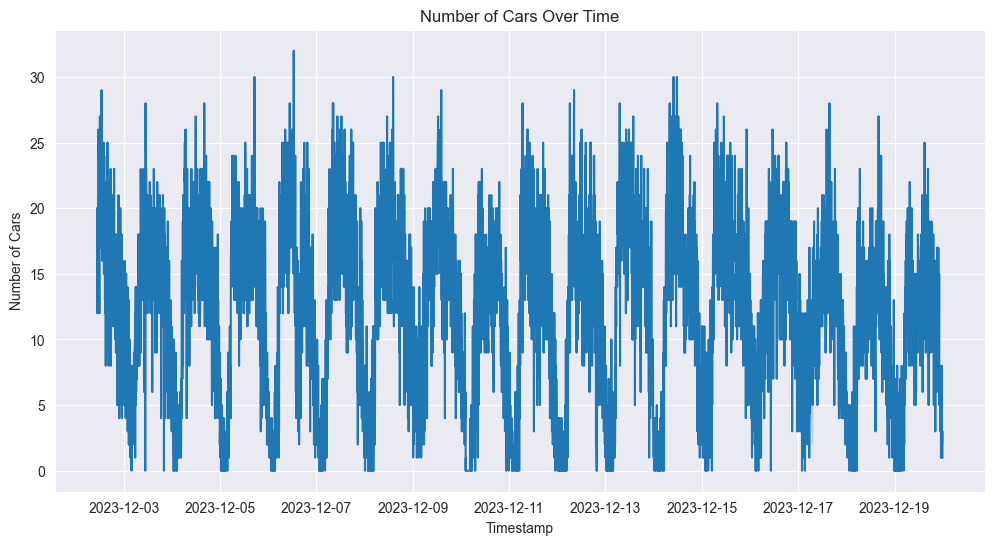

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Detections', data=df[df['Date'] < pd.to_datetime('2023-12-20T00:00:00')])
plt.title('Number of Cars Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Cars')
plt.show()


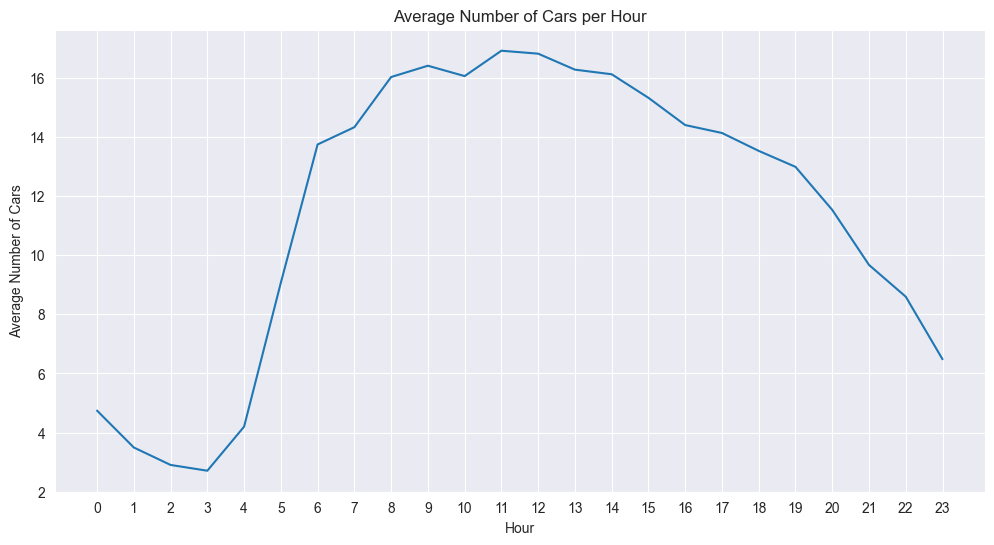

In [24]:
# Group by Hour and calculate the mean
hourly_avg = df.groupby('Hour')['Detections'].mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Average Number of Cars per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Number of Cars')
plt.xticks(range(0, 24))  # Optional: to show each hour on x-axis
plt.show()


In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cars', data=df)
plt.title('Scatter Plot: Temperature vs. Number of Cars')
plt.xlabel('Temperature')
plt.ylabel('Number of Cars')
plt.show()


ValueError: Could not interpret value `temp` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [26]:
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour

In [27]:
grouped = df.groupby(['DayOfWeek', 'Hour'])['Detections']
mean = grouped.mean()
median = grouped.median()
quartiles = grouped.quantile([.25, .75])

/var/folders/r5/wwfjfrb94h19dx2517669lg80000gn/T/ipykernel_12812/633606234.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='Hour', y='Detections', hue='DayOfWeek', estimator='mean', ci='sd')


<Axes: xlabel='Hour', ylabel='Detections'>

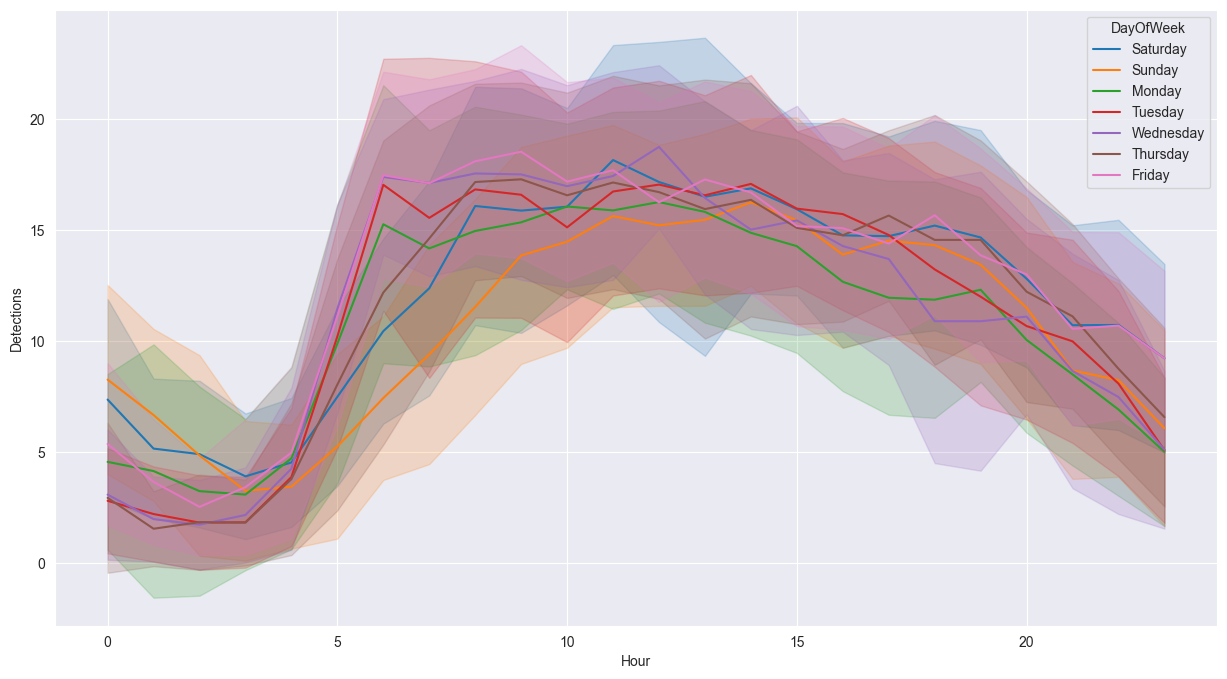

In [28]:
plt.figure(figsize=(15, 8))

# Mean with confidence interval
sns.lineplot(data=df, x='Hour', y='Detections', hue='DayOfWeek', estimator='mean', ci='sd')


KeyError: 0.25

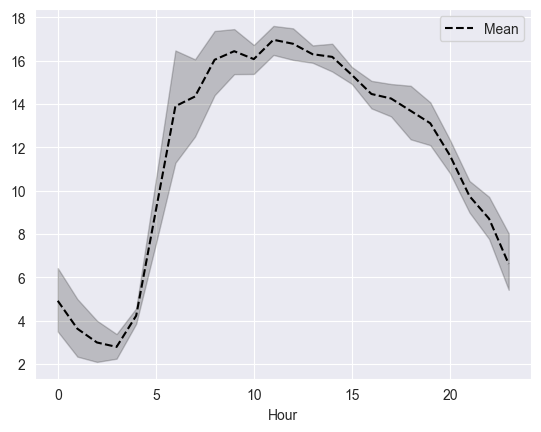

In [29]:
sns.lineplot(x=mean.index.get_level_values(1), y=mean.values, color='black', linestyle='--', label='Mean')
plt.fill_between(range(24), quartiles.loc[pd.IndexSlice[:, .25]], quartiles.loc[pd.IndexSlice[:, .75]], color='grey', alpha=0.3)


In [31]:
import matplotlib.dates as mdates

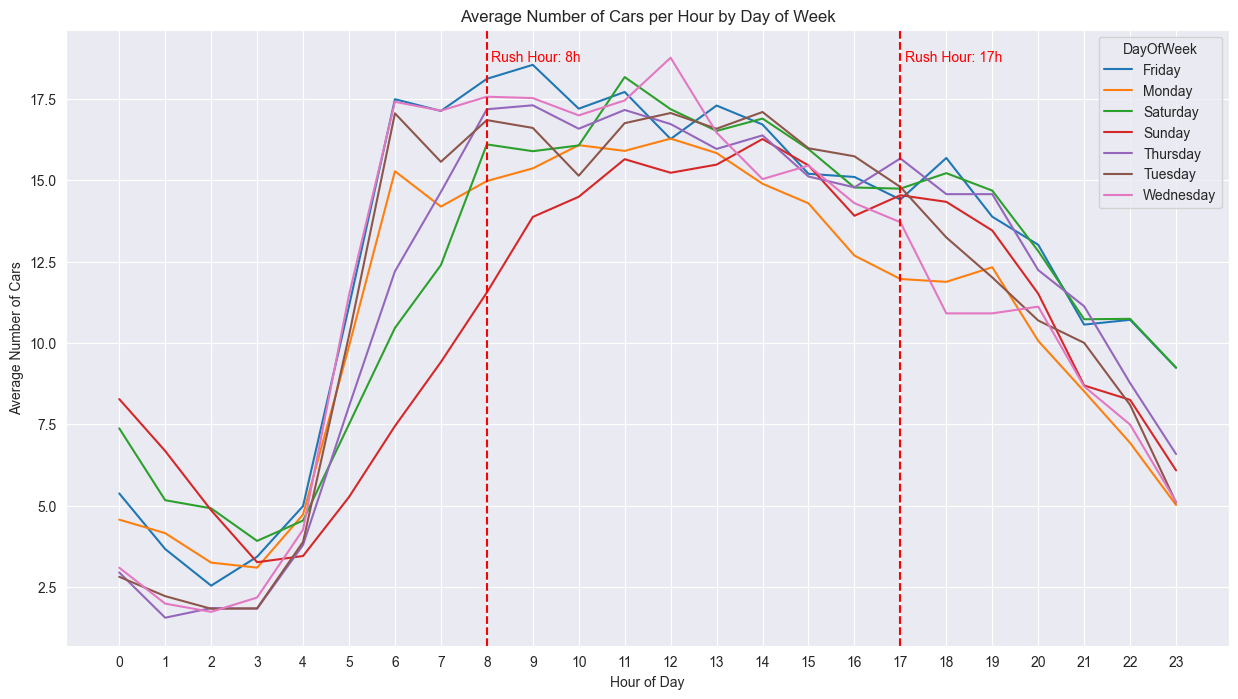

In [34]:
plt.figure(figsize=(15, 8))
hourly_avg = df.groupby(['DayOfWeek', 'Hour'])['Detections'].mean().reset_index()
sns.lineplot(data=hourly_avg, x='Hour', y='Detections', hue='DayOfWeek')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.title('Average Number of Cars per Hour by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Cars')
plt.xticks(range(24))

for hour in [8, 17]:
    plt.axvline(hour, color='red', linestyle='--')
    plt.text(hour+.1, plt.ylim()[1]*0.95, f'Rush Hour: {hour}h', color='red')

plt.show()

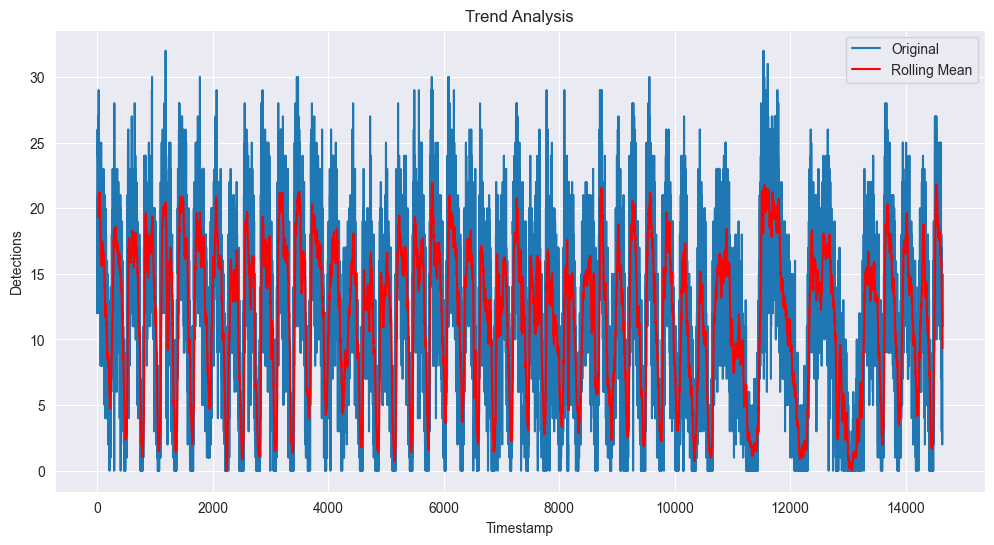

In [35]:
# Assuming 'Timestamp' is the index and 'Detections' is the target variable
df['Rolling_Mean'] = df['Detections'].rolling(window=24).mean()  # Adjust the window size as needed

# Plotting the trend
plt.figure(figsize=(12,6))
plt.plot(df['Detections'], label='Original')
plt.plot(df['Rolling_Mean'], color='red', label='Rolling Mean')
plt.title('Trend Analysis')
plt.xlabel('Timestamp')
plt.ylabel('Detections')
plt.legend()
plt.show()


In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

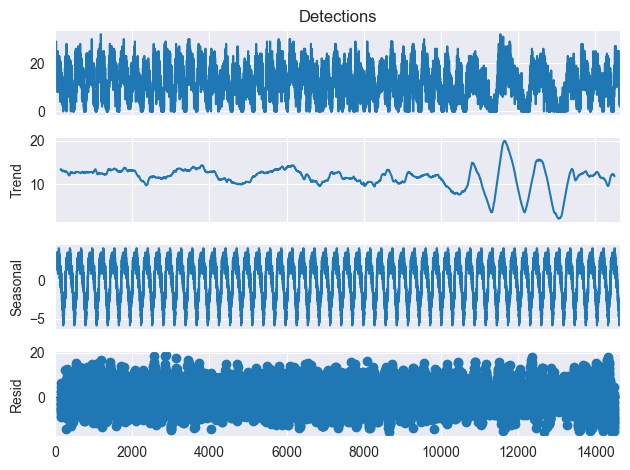

In [37]:
decomposition = seasonal_decompose(df['Detections'], model='additive', period=288)
decomposition.plot()
plt.show()


<Figure size 1200x600 with 0 Axes>

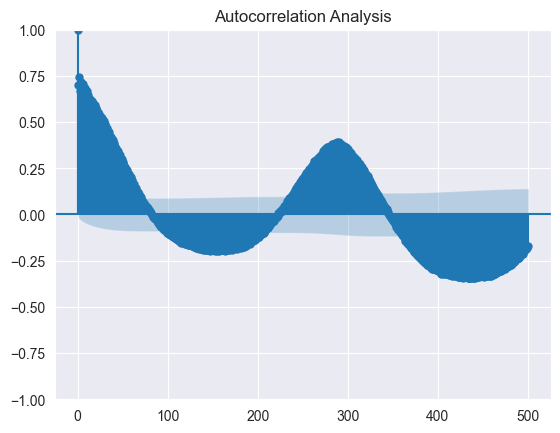

In [41]:
plt.figure(figsize=(12,6))
plot_acf(df['Detections'], lags=500)
plt.title('Autocorrelation Analysis')
plt.show()